 # <center> Baby Destination Assignment Project-2(part-1) </center>
 
Daily Data: Daily data given for likes, reach, engaged user and impression.
1. Build a regression model that predicts daily likes using variable reach, engaged user and impression. Utilize data until row 299 for regeression. Use the model to predict Likes for row 300 to 338. Comment on your actual likes vs predicted likes. What does it say about your model?


<h1> Table of Content </h1>

<ol>
        <li><a href="#ref1">Import Required libraries</a></li>
        <li><a href="#ref2">Acquiring the Data</a></li>
        <li><a href="#ref3">Preprocessing</a></li>
        <li><a href="#ref4">Build a regression model that predicts daily likes using variable reach, engaged user and impression.</a></li>
</ol>

<a id="ref1"></a>
## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="ref2"></a>
## 2. Acquiring the Data

Lets import the Daily Data sheet from the excel file

In [3]:
df1=pd.read_excel(r"C:\Users\user\Downloads\Reporting Assignment.xlsx",sheet_name="Daily Data",skiprows=1)

#### 2.1 Read first 5 rows from the dataset

In [4]:
df1.head()

,Date,Likes,Engaged users,reach,impressions
0,2015-09-11 00:00:00,45,24,212,573
1,2015-10-11 00:00:00,105,176,2619,7138
2,2015-11-11 00:00:00,137,163,2700,4088
3,2015-12-11 00:00:00,154,212,3428,6565
4,11/13/15,148,220,3624,6133


#### 2.2 Check the size of the dataset

In [5]:
df1.shape

(539, 5)

<a id="ref3"></a>
## 3. Preprocessing

#### 3.1 lets seperate the Date from "Date Posted" column using pandas DatetimeIndex function to keep it in the same format

In [6]:
df1["Date"]=pd.DatetimeIndex(df1["Date"]).date
df1=df1.rename(columns={"Engaged users":"Engaged_users"})
df1.head()

,Date,Likes,Engaged_users,reach,impressions
0,2015-09-11,45,24,212,573
1,2015-10-11,105,176,2619,7138
2,2015-11-11,137,163,2700,4088
3,2015-12-11,154,212,3428,6565
4,2015-11-13,148,220,3624,6133


<a id="ref4"></a>
### 4. Build a regression model that predicts daily likes using variable reach,engaged user and impression. 

#### 4.1 Reg plot Engaged_users Vs Likes

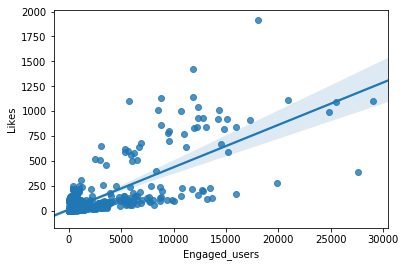

In [7]:
sns.regplot(x="Engaged_users", y="Likes", data=df1)

#### 4.2 reg plot Reach vs Likes

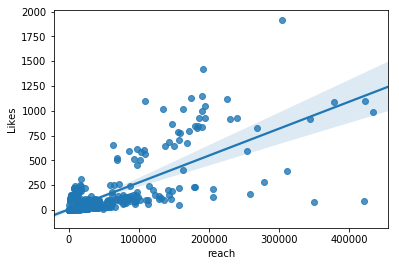

In [70]:
plt.plot(figsize=(15,15))
sns.regplot(x="reach", y="Likes", data=df1)

#### 4.3 Reg plot Impressions vs Likes

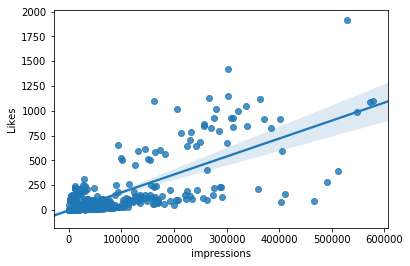

In [9]:
sns.regplot(x="impressions", y="Likes", data=df1)

#### 4.4 Multiple regression

multiple regression is when more than one independent variable is present. 
For example, predicting Likes using "Engaged_users","reach","impressions"
Depending on the relation between dependent and independent variables, it can be either linear, or nonlinear regression. 

Feature Set(X and y)
Lets define X, and y for our dataset:

X as the Feature Matrix (independent variable)
y as the response vector (target- Dependent Variable)

In [65]:
x=df1[["Engaged_users","reach","impressions"]]
y=df1[["Likes"]]

#### 4.5 Now we split our data into training and testing data  using the function <b>train_test_split</b>. 

In [33]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)

print("number of training samples:",x_train.shape[0])
print("number of test samples :", x_test.shape[0])


number of training samples: 431
number of test samples : 108


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 20% of the total dataset.

#### 4.6 Let's import LinearRegression from the module linear_model and  create a Linear Regression object (l)
Also we will for the model using training data

In [35]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 4.7 Let's Calculate the R^2 on the test data:

In [36]:
l.score(x_test,y_test)

0.503873475224234

In [66]:
l.score(x_train,y_train)

0.5939112267817188

we can see the R^2 is much smaller using the test data.

#### 4.8 Prediction using training data

In [37]:
yhat_train = lr.predict(x_train)
yhat_train[0:5]

array([[ 19.63710466],
       [442.21687368],
       [ 29.3144978 ],
       [612.64693608],
       [ 33.99815603]])

#### Prediction using test data: 

In [38]:
yhat_test = lr.predict(x_test)
yhat_test[0:5]

array([[13.63674151],
       [24.17230441],
       [79.88061749],
       [95.49544615],
       [14.738708  ]])

#### 4.9. Let's perform some model evaluation using our training and testing data separately. First  we import the seaborn and matplotlibb library for plotting.

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [59]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Likes')

    plt.show()
    plt.close()

#### Let's examine the distribution of the predicted values of the training data.

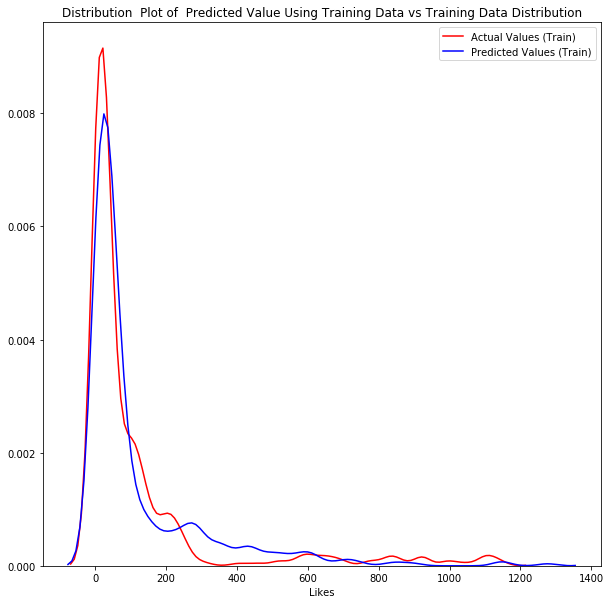

In [60]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

#### Let's examine the distribution of the predicted values of the test data.

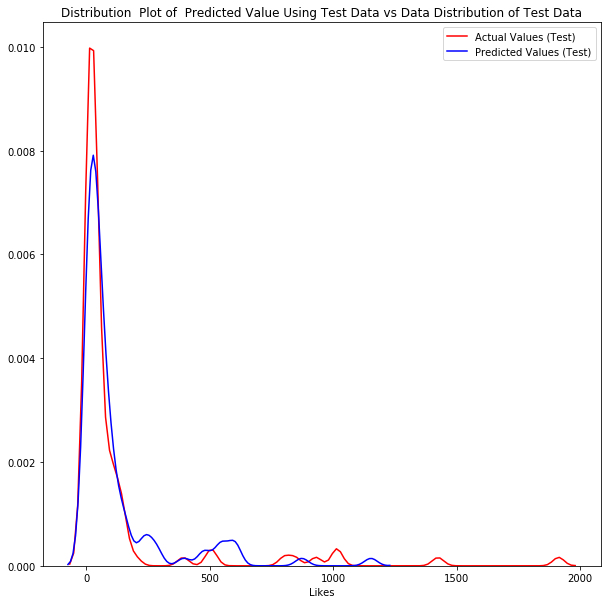

In [61]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<p>Comparing Figure 1 and Figure 2; it is evident the distribution of the test data is good at fitting the data.</p>

In [54]:
print("Predicted values:", yhat_test[0:10])
print("Actual values:", y_test[0:10].values)

Predicted values: [[13.63674151]
 [24.17230441]
 [79.88061749]
 [95.49544615]
 [14.738708  ]
 [19.36641641]
 [ 5.43232566]
 [12.11601095]
 [83.59029142]
 [57.1203709 ]]
Actual values: [[22]
 [20]
 [47]
 [31]
 [ 8]
 [10]
 [ 1]
 [ 3]
 [23]
 [35]]


In [67]:
print("Predicted values:", yhat_train[0:10])
print("Actual values:", y_train[0:10].values)

Predicted values: [[ 19.63710466]
 [442.21687368]
 [ 29.3144978 ]
 [612.64693608]
 [ 33.99815603]
 [ 60.36387746]
 [256.00337041]
 [ 26.34158124]
 [ 38.20048808]
 [269.24721345]]
Actual values: [[  2]
 [781]
 [ 29]
 [128]
 [ 13]
 [ 46]
 [113]
 [ 40]
 [ 13]
 [112]]
